In [2]:
import pandas as pd
df1=pd.read_csv('data.csv')
df1

,day,outlook,temp,humidity,wind,play
0,D1,Sunny,Hot,High,Weak,No
1,D2,Sunny,Hot,High,Strong,No
2,D3,Overcast,Hot,High,Weak,Yes
3,D4,Rain,Mild,High,Weak,Yes
4,D5,Rain,Cool,Normal,Weak,Yes
5,D6,Rain,Cool,Normal,Strong,No
6,D7,Overcast,Cool,Normal,Strong,Yes
7,D8,Sunny,Mild,High,Weak,No
8,D9,Sunny,Cool,Normal,Weak,Yes
9,D10,Rain,Mild,Normal,Weak,Yes


In [3]:
df2=pd.read_csv('iris.csv')
df2

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
from sklearn.model_selection import train_test_split
X = df2.iloc[:,:-1].values
y = df2.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [7]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(handle_unknown='ignore')
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
model = MultinomialNB()
pipe = Pipeline([('encoding', enc), ('model', model)])
pipe.fit(X_train, y_train)

Pipeline(steps=[('encoding', OneHotEncoder(handle_unknown='ignore')),
                ('model', MultinomialNB())])

In [11]:
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay
y_pred = pipe.predict(X)
print("Number of mislabeled points out of a total %d points : %d" % (X.shape[0], (y != y_pred).sum()))
print("Accuracy =", accuracy_score(y,y_pred))

Number of mislabeled points out of a total 150 points : 6
Accuracy = 0.96


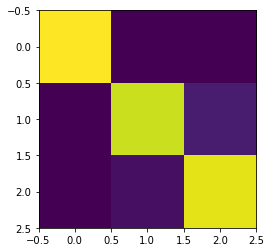

In [19]:
import matplotlib.pyplot as plt
cm = confusion_matrix(y, y_pred, labels=model.classes_)
plt.imshow(cm)

In [28]:
import plotly.graph_objects as gra
import numpy as np
fig = gra.Figure()
fig.add_trace(gra.Histogram(x=y,name="True Target"))
fig.add_trace(gra.Histogram(x=y_pred,name="Predicted"))
fig.update_layout(barmode='overlay')
fig.update_traces(opacity=0.5)
fig.show()